In [1]:
#####
# test notebook to make sure simulation functions work
#####

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from simulation_functions import simulate_and_calculate_pl
from simulation_parameters import sample_params

In [3]:
df = pd.read_csv('gas_prices_since_march_2020.csv')

In [4]:
params = {'upfront_fee': 0,
 'monthly_opened_streams': 500,
 'average_stream_lifetime': 10,
 'percent_accidently_liquidated_per_month': 20,
 'average_stream_size': 1000,
 'liquidator_capital': 20000,
 'upfront_hours': 0,
 'refund_rate': 1,
 'gas_tank_size': 20,
 'max_days_to_return': 7,
 'max_liquidation_wait_time': 24,
 'min_self_liquidation_savings': 0}

In [5]:
df = simulate_and_calculate_pl(df, params)

In [6]:
# show UPPER BOUND on incurred cost per stream - does not include any gas prediction or optimization
incurred_cost_per_tx = np.sum(df['gas_tank_eth_pl']) / (np.sum(df['n_self_closed']) + np.sum(df['n_liquidated'])) # in eth
print(incurred_cost_per_tx)

-0.024199781669168256


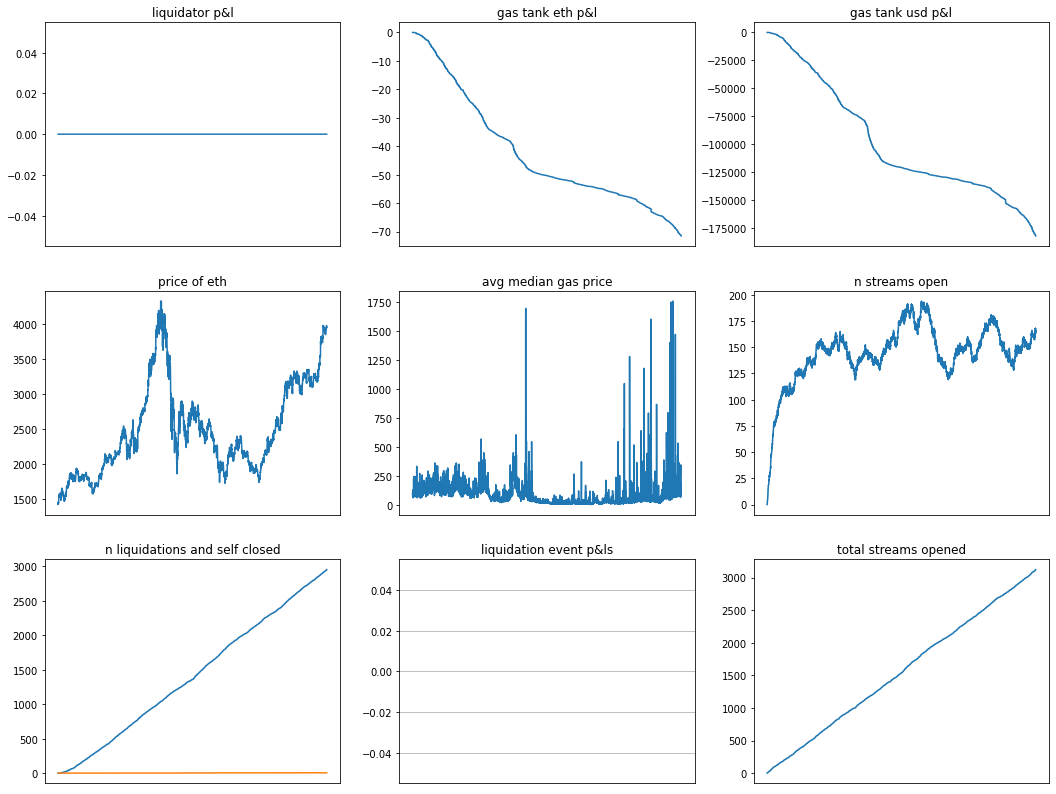

In [8]:
graph_pl(df)

In [9]:
# randomly sample
params = sample_params()
params

{'upfront_fee': 0.02964234349684497,
 'monthly_opened_streams': 284.7656365305348,
 'average_stream_lifetime': 214.26600127820222,
 'percent_accidently_liquidated_per_month': 7.594351411433311,
 'average_stream_size': 4645.796649147018,
 'liquidator_capital': 31586.688927729825,
 'upfront_hours': 5.092077435043888,
 'refund_rate': 0.7169026895662683,
 'gas_tank_size': 246.17755586220645,
 'max_days_to_return': 60.540402057357035,
 'max_liquidation_wait_time': 4.823301900064244,
 'min_self_liquidation_savings': 13.11705506221362}

In [10]:
df = simulate_and_calculate_pl(df, params)

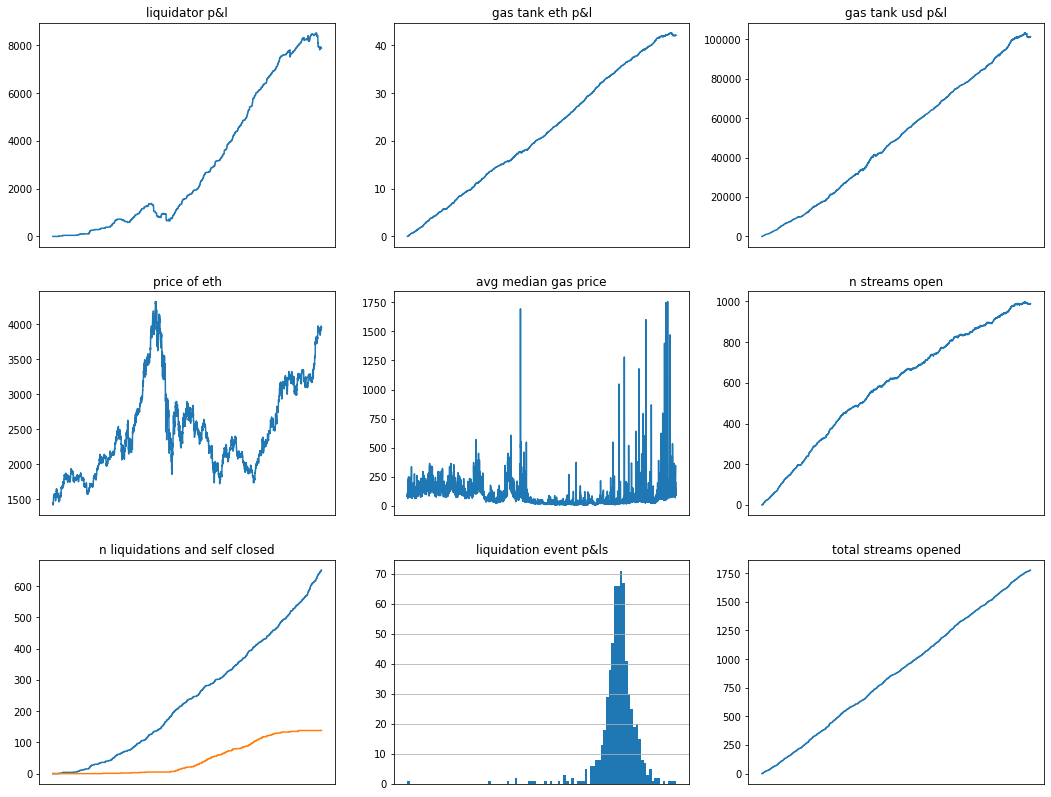

In [11]:
graph_pl(df)

In [7]:
def graph_pl(df):
    fig, axs = plt.subplots(3,3,figsize=(18, 14))
    for i, ax in enumerate(axs.flat):
        if i == 0:
            df['liquidator_pl'].cumsum().plot(ax=ax)
            ax.set_title('liquidator p&l')
        elif i == 1:
            df['gas_tank_eth_pl'].cumsum().plot(ax=ax)
            ax.set_title('gas tank eth p&l')
        elif i == 2:
            df['gas_tank_usd_pl'].cumsum().plot(ax=ax)
            ax.set_title('gas tank usd p&l')
        elif i == 3:
            df['price'].plot(ax=ax)
            ax.set_title('price of eth')
        elif i == 4:
            df['avg_median'].plot(ax=ax)
            ax.set_title('avg median gas price')
        elif i == 5:
            (df['n_opened'].cumsum() - df['n_self_closed'].cumsum() - df['n_liquidated'].cumsum()).plot(ax=ax)
            ax.set_title('n streams open')
        elif i == 6:
            df['n_liquidated'].cumsum().plot(ax=ax)
            ax.set_title('n liquidations and self closed')
            df['n_self_closed'].cumsum().plot(ax=ax)
        elif i == 7:
            df.loc[df['liquidator_pl'] != 0, 'liquidator_pl'].hist(bins=100, ax=ax)
            ax.set_title('liquidation event p&ls')
        elif i == 8:
            df['n_opened'].cumsum().plot(ax=ax)
            ax.set_title('total streams opened')
        ax.set_xticks([])